## Design MLP model with tensorflow for mnist dataset

In [15]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,  Activation, Flatten, Dropout


In [16]:
# import MNIST dataset:

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Shapes:")
print(f"x train : {x_train.shape}")
print(f"y train : {y_train.shape}")
print(f"x test  : {x_test.shape}")
print(f"y test  : {y_test.shape}")

Shapes:
x train : (60000, 28, 28)
y train : (60000,)
x test  : (10000, 28, 28)
y test  : (10000,)


In [17]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, input_dim=784, activation='relu'),  # Input layer with 25 units and ReLU activation
    Dropout(0.2),
    Dense(64, activation='relu'),  # Hidden layer with 15 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units (for 10 classes) and softmax activation
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# fit model
MLP_model = model.fit(x_train, y_train,
          epochs=20,
          validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2802 - accuracy: 0.9163 - val_loss: 0.1213 - val_accuracy: 0.9623
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1317 - accuracy: 0.9595 - val_loss: 0.0933 - val_accuracy: 0.9716
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1042 - accuracy: 0.9675 - val_loss: 0.0873 - val_accuracy: 0.9729
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0856 - accuracy: 0.9730 - val_loss: 0.0761 - val_accuracy: 0.9746
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0755 - accuracy: 0.9760 - val_loss: 0.0782 - val_accuracy: 0.9748
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0687 - accuracy: 0.9778 - val_loss: 0.0741 - val_accuracy: 0.9773
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0622 - accuracy: 0.9801 - val_loss: 0.0734 - val_accurac

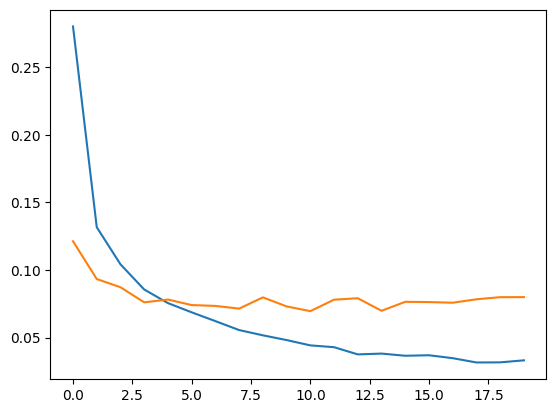

In [22]:
# plot Loss
plt.plot(MLP_model.history["loss"])
plt.plot(MLP_model.history["val_loss"])

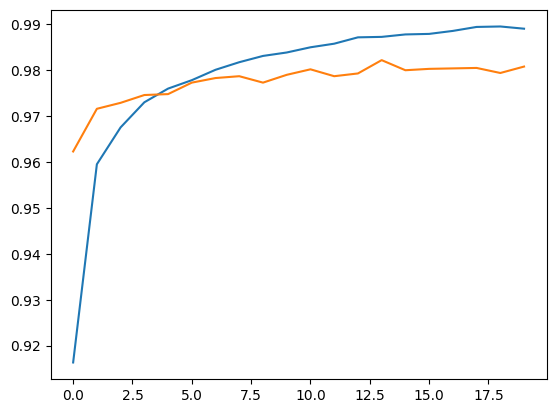

In [23]:
# plot accuracy=
plt.plot(MLP_model.history["accuracy"])
plt.plot(MLP_model.history["val_accuracy"])